# 平均を引いたdfを作成する．

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
path = '../../data/raw/df.xlsx'
df = pd.read_excel(path)
df.head()

,island_names,year,pseudo_year,island_ids,region_codes,region_names,prefecture_codes,population,treatment_group,treatment_group_mainland,bridge_year,pseudo_bridge_year,after_treatment,connect_mainland_year,after_treatment_mainland,income,prefecture_names,area_km2,distance_m
0,島後,1970,1970,62,32528,隠岐の島町,32,21123.0,0,0,0,0,0,0,0,NaN,島根県,241.53,67840.0
1,島後,1975,1975,62,32528,隠岐の島町,32,19938.0,0,0,0,0,0,0,0,NaN,島根県,241.53,67840.0
2,島後,1980,1980,62,32528,隠岐の島町,32,20101.0,0,0,0,0,0,0,0,NaN,島根県,241.53,67840.0
3,島後,1985,1985,62,32528,隠岐の島町,32,19675.0,0,0,0,0,0,0,0,13388287.0,島根県,241.53,67840.0
4,島後,1990,1990,62,32528,隠岐の島町,32,19090.0,0,0,0,0,0,0,0,15888108.0,島根県,241.53,67840.0


In [105]:
df['log_pop'] = np.log(df['population'])
# Calculate the mean population for each island_id
mean_population_per_island = df.groupby('island_ids')['population'].transform('mean')
mean_log_pop_per_island = df.groupby('island_ids')['log_pop'].transform('mean')
# Subtract the mean population from the population column
df['pop_centered'] = df['population'] - mean_population_per_island
df['log_pop_centered'] = df['log_pop'] - mean_log_pop_per_island

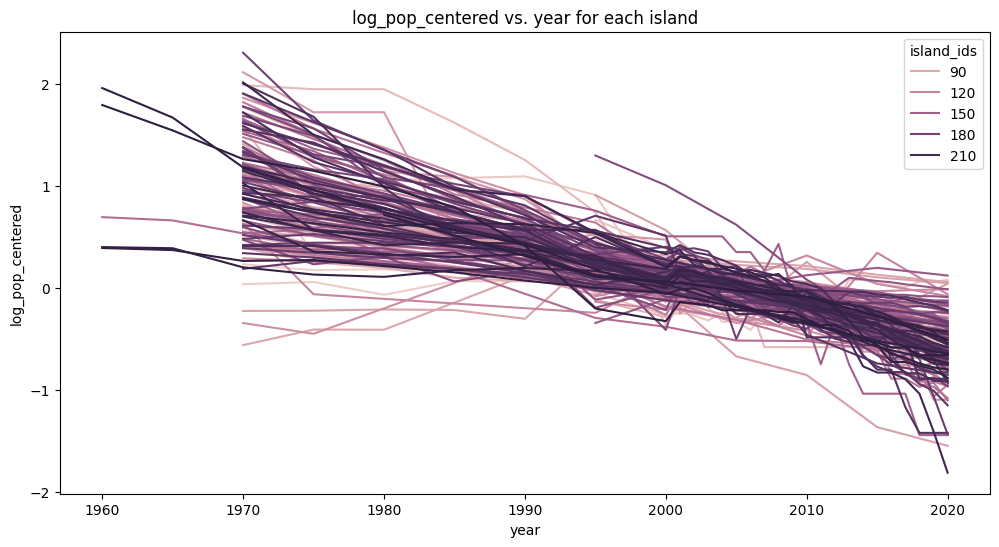

In [106]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='log_pop_centered', hue='island_ids', data=df)
plt.title('log_pop_centered vs. year for each island')
plt.show()

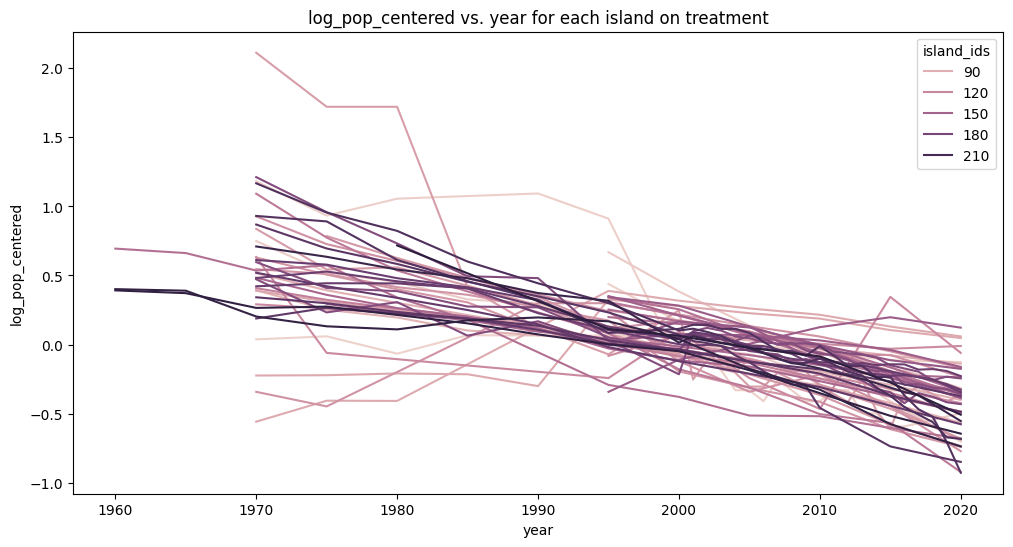

In [107]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='log_pop_centered', hue='island_ids', data=df[df['treatment_group'] == 1])
plt.title('log_pop_centered vs. year for each island on treatment')
plt.show()

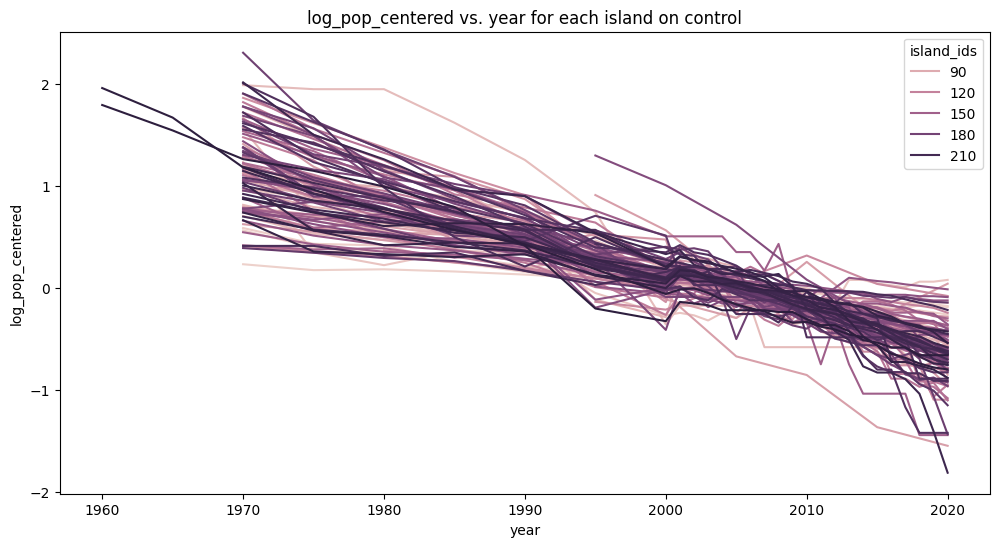

In [108]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='log_pop_centered', hue='island_ids', data=df[df['treatment_group'] == 0])
plt.title('log_pop_centered vs. year for each island on control')
plt.show()

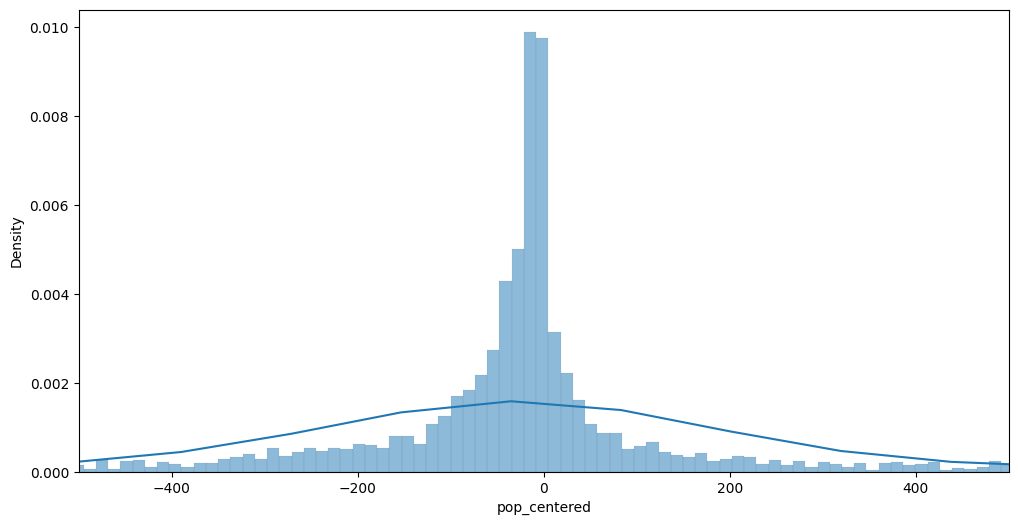

In [109]:
plt.figure(figsize=(12, 6))
sns.histplot(df['pop_centered'], kde=True, stat='density')
plt.xlim(-500, 500)
plt.show()

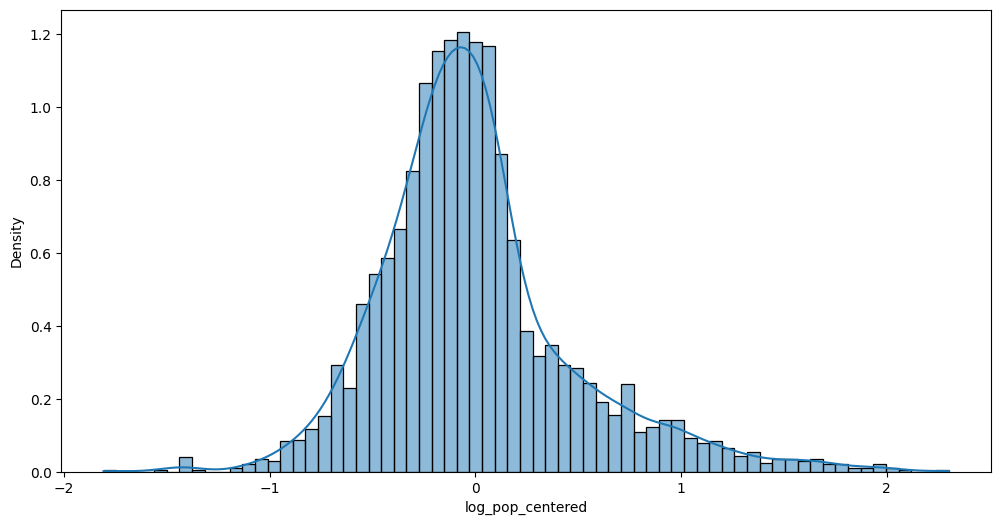

In [110]:
plt.figure(figsize=(12, 6))
sns.histplot(df['log_pop_centered'], kde=True, stat='density')
plt.show()